In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import utils
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neural_network import MLPRegressor


In [4]:
# suicides_no correlations
# suicides_no              1.0000000000
# population               0.7527496258
# healthcare_coverage     -0.3112210750
# suicides_per_100k_pop    0.2294931317
# country                  0.1941055561
# sex                      0.1825902701
# gini                     0.1194502160
# gdp_per_capita           0.0540850263
# continent                0.0478441265
# age                      0.0149417279
# year                    -0.0095477162

X_cols_all = ['country', 'continent', 'sex', 'age', 'year',
              'gdp_per_capita', 'healthcare_coverage', 'gini', 'population']
# test with no geo informtion
X_cols_no_geo_data = ['sex', 'age', 'year', 'gdp_per_capita',
                      'healthcare_coverage', 'gini', 'population']
X_cols_no_geo_data_no_hc_no_gini = [
    'sex', 'age', 'year', 'gdp_per_capita', 'population']
X_cols_no_hc_no_gini = ['country', 'continent', 'sex',
                        'age', 'year', 'gdp_per_capita', 'population']

x_cols_opts = [X_cols_all, X_cols_no_geo_data,X_cols_no_hc_no_gini, X_cols_no_geo_data_no_hc_no_gini]
ds_variants = [utils.get_train_test_split(X_cols=opt) for opt in x_cols_opts]
linear_models = []
dtr_models = []
mlp_models = []
for i, (X_train_std, X_test_std, Y_train, Y_test) in enumerate(ds_variants):  
    print(f"DS: {x_cols_opts[i]}")
    # train models for these options
    ### linear
    print("Linear")
    linear_model = LinearRegression(positive=False)
    linear_model.fit(X_train_std, Y_train)  
    linear_models.append(linear_model)

    ### dtr
    # create a regressor object
    print("DTR")
    dtr_model = DecisionTreeRegressor(random_state = 0) 
    # fit the regressor with X and Y data
    dtr_model.fit(X_train_std, Y_train)
    dtr_models.append(dtr_model)

    ### mlp
    print("MLP")
    mlp_model = MLPRegressor(
    hidden_layer_sizes=[512,256,64,8],
    max_iter=3000,
    activation='relu')
    mlp_model.fit(X_train_std,Y_train)
    mlp_models.append(mlp_model)



DS: ['country', 'continent', 'sex', 'age', 'year', 'gdp_per_capita', 'healthcare_coverage', 'gini', 'population']
Linear
DTR
MLP
DS: ['sex', 'age', 'year', 'gdp_per_capita', 'healthcare_coverage', 'gini', 'population']
Linear
DTR
MLP
DS: ['country', 'continent', 'sex', 'age', 'year', 'gdp_per_capita', 'population']
Linear
DTR
MLP
DS: ['sex', 'age', 'year', 'gdp_per_capita', 'population']
Linear
DTR
MLP


In [39]:
predicitons = {
    'linear' : [],
    'dtr' : [],
    'mlp' : [],
}

for i, (_, X_test_std, _, Y_test) in enumerate(ds_variants):  
    predicitons['linear'].append(linear_models[i].predict(X_test_std))
    predicitons['dtr'].append(dtr_models[i].predict(X_test_std))
    predicitons['mlp'].append(mlp_models[i].predict(X_test_std))

# predicitons

<AxesSubplot: >

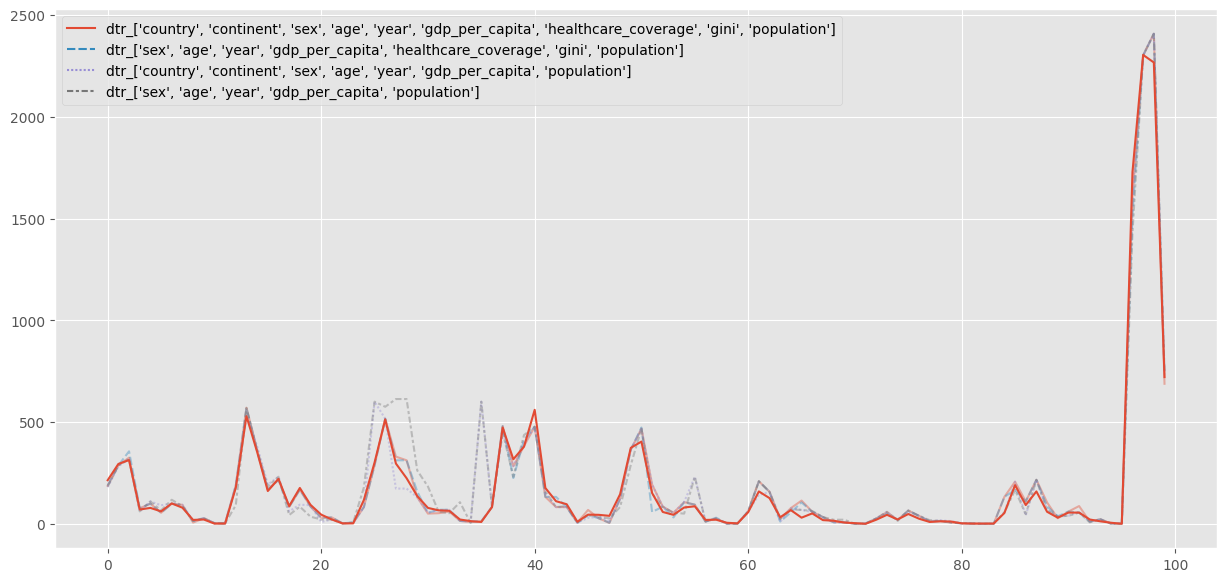

In [37]:
_, _, _,Y_test = utils.get_train_test_split()
n_samples =100
lin_df = pd.DataFrame({f"linear_{x_cols_opts[i]}":pred[:n_samples] for i, pred in enumerate(predicitons['linear'])})
dtr_df = pd.DataFrame({f"dtr_{x_cols_opts[i]}":pred[:n_samples] for i, pred in enumerate(predicitons['dtr'])})
mlp_df = pd.DataFrame({f"mlp_{x_cols_opts[i]}":pred[:n_samples] for i, pred in enumerate(predicitons['mlp'])})
fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(dtr_df, alpha=.4, color='blue')
sns.lineplot(Y_test[:n_samples])

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, max_error
# find best match
mse = {}
mae = {}
for model_type in predicitons.keys():
    for i in range(len(ds_variants)):
        mse[f'{model_type}_{x_cols_opts[i]}'] = mean_squared_error(Y_test, predicitons[model_type][i])
        mae[f'{model_type}_{x_cols_opts[i]}'] = mean_absolute_error(Y_test, predicitons[model_type][i])
mse

{"linear_['country', 'continent', 'sex', 'age', 'year', 'gdp_per_capita', 'healthcare_coverage', 'gini', 'population']": 378386.29195839464,
 "linear_['sex', 'age', 'year', 'gdp_per_capita', 'healthcare_coverage', 'gini', 'population']": 381476.5753783904,
 "linear_['country', 'continent', 'sex', 'age', 'year', 'gdp_per_capita', 'population']": 388169.14727729687,
 "linear_['sex', 'age', 'year', 'gdp_per_capita', 'population']": 384931.9195477359,
 "dtr_['country', 'continent', 'sex', 'age', 'year', 'gdp_per_capita', 'healthcare_coverage', 'gini', 'population']": 7821.351449275362,
 "dtr_['sex', 'age', 'year', 'gdp_per_capita', 'healthcare_coverage', 'gini', 'population']": 39458.260869565216,
 "dtr_['country', 'continent', 'sex', 'age', 'year', 'gdp_per_capita', 'population']": 14004.22463768116,
 "dtr_['sex', 'age', 'year', 'gdp_per_capita', 'population']": 106906.91304347826,
 "mlp_['country', 'continent', 'sex', 'age', 'year', 'gdp_per_capita', 'healthcare_coverage', 'gini', 'popul

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, "linear_['country', 'continent', 'sex', 'age', 'year', 'gdp_per_capita', 'healthcare_coverage', 'gini', 'population']"),
  Text(1, 0, "linear_['sex', 'age', 'year', 'gdp_per_capita', 'healthcare_coverage', 'gini', 'population']"),
  Text(2, 0, "linear_['country', 'continent', 'sex', 'age', 'year', 'gdp_per_capita', 'population']"),
  Text(3, 0, "linear_['sex', 'age', 'year', 'gdp_per_capita', 'population']"),
  Text(4, 0, "dtr_['country', 'continent', 'sex', 'age', 'year', 'gdp_per_capita', 'healthcare_coverage', 'gini', 'population']"),
  Text(5, 0, "dtr_['sex', 'age', 'year', 'gdp_per_capita', 'healthcare_coverage', 'gini', 'population']"),
  Text(6, 0, "dtr_['country', 'continent', 'sex', 'age', 'year', 'gdp_per_capita', 'population']"),
  Text(7, 0, "dtr_['sex', 'age', 'year', 'gdp_per_capita', 'population']"),
  Text(8, 0, "mlp_['country', 'continent', 'sex', 'age', 'year', 'gdp_per_capita', 'healthcare_coverag

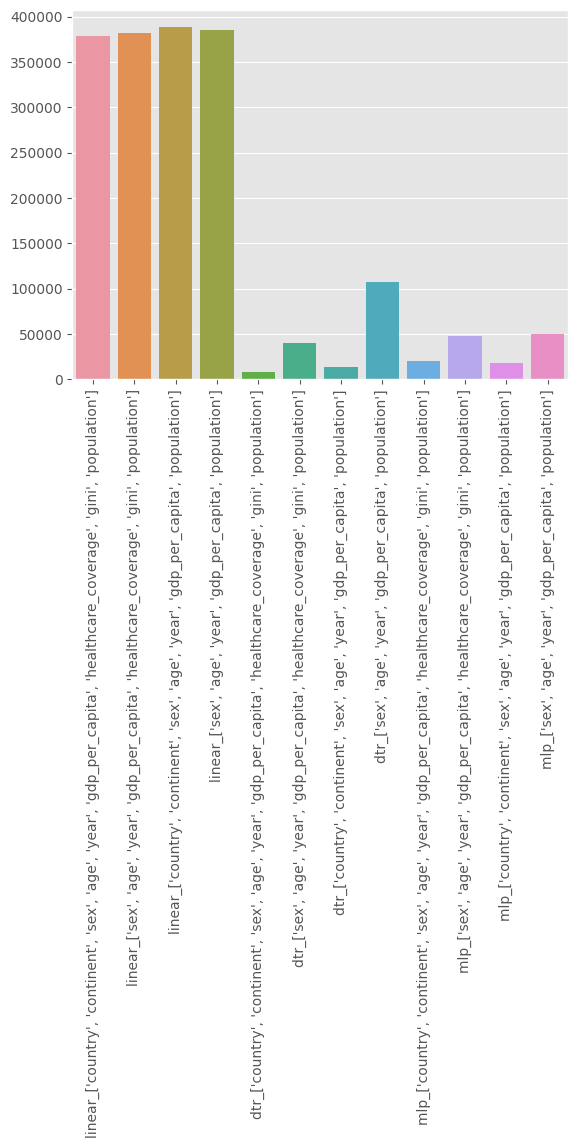

In [58]:
df = pd.DataFrame(mse, index=range(1))
sns.barplot(df)
plt.title("MSE")
plt.xticks(rotation=90)


In [ ]:
df = pd.DataFrame(mae, index=range(1))
sns.barplot(df)
plt.title("MAE")

plt.xticks(rotation=90)